In [13]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

train_path = 'C:/Users/zhang/mine/finTech/data/A/训练数据集'
test_path = 'C:/Users/zhang/mine/finTech/data/A/评分数据集'

train_tag_DF = pd.read_csv(train_path + '/训练数据集_tag.csv')
train_trd_DF = pd.read_csv(train_path + '/训练数据集_trd.csv')
train_beh_DF = pd.read_csv(train_path + '/训练数据集_beh.csv')

# 0: 违约
# 1: 诚信

In [14]:
##########################
# 还原缺失值
colname = train_tag_DF.columns.values.tolist()
for col in colname:
    if not np.issubdtype(train_tag_DF[col], np.int64):
        train_tag_DF.loc[train_tag_DF[col] == '\\N', col] = np.nan
        train_tag_DF.loc[train_tag_DF[col] == '~', col] = np.nan
        
train_tag_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               39923 non-null  object
 1   flag                             39923 non-null  int64 
 2   gdr_cd                           39187 non-null  object
 3   age                              39923 non-null  int64 
 4   mrg_situ_cd                      38939 non-null  object
 5   edu_deg_cd                       26643 non-null  object
 6   acdm_deg_cd                      39186 non-null  object
 7   deg_cd                           1174 non-null   object
 8   job_year                         39430 non-null  object
 9   ic_ind                           39430 non-null  object
 10  fr_or_sh_ind                     39430 non-null  object
 11  dnl_mbl_bnk_ind                  39430 non-null  object
 12  dnl_bind_cmb_lif_ind            

In [3]:
#train_tag_DF.drop(['deg_cd', 'atdd_type', 'edu_deg_cd'], axis = 1, inplace = True)

In [4]:
train_tag_DF.loc[train_tag_DF.isna().T.any()]

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0,M,41,B,B,Z,NaN,3,0,0,0,1,0,0,0,-1,0,-1,4,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,0,3,1,0,3492,-1,10
1,U557810,0,M,35,A,NaN,G,NaN,4,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,-1,0,0,0,1,1,0,4575,-1,10
3,U6DED00,0,F,41,B,NaN,Z,NaN,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,0,1,1,0,4938,-1,10
5,UE2EC3C,0,F,48,B,C,31,NaN,8,0,1,0,0,0,0,0,-1,0,-1,-1,1,3,-1,3,0,0,0,0,0,0,0,0,0,-1,0,0,0,1,1,0,1668,-1,20
6,UCEC228,0,F,39,A,B,30,NaN,2,0,0,1,0,0,0,0,350,1,1,2,1,5,6,3,0,0,0,0,0,0,0,0,0,-1,0,0,0,1,1,0,2309,-1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,U8E66E5,1,M,24,A,NaN,G,NaN,1,0,1,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,1,NaN,1,0,1,-1,165,0
39919,U70BACF,0,M,41,B,NaN,G,NaN,1,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,0,NaN,1,0,2,-1,166,0
39920,U777E7D,0,M,29,A,NaN,G,NaN,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,NaN,3,0,1,-1,166,0
39921,UE77AAD,0,M,31,A,NaN,31,NaN,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,NaN,3,0,1,-1,166,0


In [5]:
train_tag_DF.loc[train_tag_DF.isna().T.any()].flag.value_counts()

0    30135
1     8822
Name: flag, dtype: int64

In [6]:
train_tag_DF[train_tag_DF['frs_agn_dt_cnt'] == '-1'].flag.value_counts()

0    23626
1     7008
Name: flag, dtype: int64

In [7]:
train_tag_DF[train_tag_DF['frs_agn_dt_cnt'] == '0'].flag.value_counts()

0    3
Name: flag, dtype: int64

In [8]:
train_tag_DF[train_tag_DF['cur_debit_min_opn_dt_cnt'] == -1].flag.value_counts()
#train_tag_DF.cur_debit_min_opn_dt_cnt.value_counts()

0    9911
1    2850
Name: flag, dtype: int64

In [9]:
train_tag_DF.l1y_crd_card_csm_amt_dlm_cd.value_counts()

3    11740
0     8036
5     6540
4     5072
1     4848
2     3187
Name: l1y_crd_card_csm_amt_dlm_cd, dtype: int64

In [15]:
train_tag_DF.crd_card_act_ind.value_counts()

1    28594
0    10829
Name: crd_card_act_ind, dtype: int64

In [16]:
I12_mon_whl_tms = train_tag_DF[['l12mon_buy_fin_mng_whl_tms',
                               'l12_mon_fnd_buy_whl_tms',
                               'l12_mon_insu_buy_whl_tms',
                               'l12_mon_gld_buy_whl_tms']].apply(lambda x: x.fillna(0).astype(np.int).sum(), axis = 1)

train_tag_DF['I12_mon_whl_tms'] = I12_mon_whl_tms# 理财产品、基金、保险、黄金购买次数总和


############################
# 填充缺失值
#train_tag_DF.loc[train_tag_DF['frs_agn_dt_cnt'] == '-1', 'frs_agn_dt_cnt'] = 0
#train_tag_DF['frs_agn_dt_cnt'].fillna(train_tag_DF['frs_agn_dt_cnt'].astype(np.float).mean(), inplace = True)
#train_tag_DF['frs_agn_dt_cnt'].fillna(0, inplace = True)
#train_tag_DF['frs_agn_dt_cnt'] = train_tag_DF['frs_agn_dt_cnt'].astype(np.int64)

#train_tag_DF.loc[train_tag_DF['cur_debit_min_opn_dt_cnt'] == -1, 'cur_debit_min_opn_dt_cnt'] = 0
train_tag_DF['cur_debit_min_opn_dt_cnt'] = train_tag_DF['cur_debit_min_opn_dt_cnt'].astype(np.int64)
#train_tag_DF.loc[train_tag_DF['cur_credit_min_opn_dt_cnt'] == -1, 'cur_credit_min_opn_dt_cnt'] = 0
train_tag_DF['cur_credit_min_opn_dt_cnt'] = train_tag_DF['cur_credit_min_opn_dt_cnt'].astype(np.int64)

train_tag_DF[['gdr_cd', 'mrg_situ_cd', 'acdm_deg_cd']] = train_tag_DF[['gdr_cd', 'mrg_situ_cd', 'acdm_deg_cd']].fillna('Unknown')

train_tag_DF[['fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd',
              'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'pl_crd_lmt_cd', 'hld_crd_card_grd_cd',
              'l1y_crd_card_csm_amt_dlm_cd', 'cur_debit_crd_lvl']] = \
    train_tag_DF[['fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd',
                  'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'hld_crd_card_grd_cd',
                  'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd', 'cur_debit_crd_lvl']].fillna('-2')
train_tag_DF[['fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd',
              'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'pl_crd_lmt_cd', 'hld_crd_card_grd_cd',
              'l1y_crd_card_csm_amt_dlm_cd', 'cur_debit_crd_lvl']] = \
    train_tag_DF[['fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd',
                  'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'hld_crd_card_grd_cd',
                  'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd', 'cur_debit_crd_lvl']].astype(np.int64)

train_tag_DF[['job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
              'l6mon_agn_ind',  'vld_rsk_ases_ind', 'loan_act_ind', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
              'crd_card_act_ind', 'cur_debit_cnt', 'frs_agn_dt_cnt']] = \
    train_tag_DF[['job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
                  'l6mon_agn_ind',  'vld_rsk_ases_ind', 'loan_act_ind', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
                  'crd_card_act_ind', 'cur_debit_cnt', 'frs_agn_dt_cnt']].fillna(-2)
train_tag_DF[['job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
              'l6mon_agn_ind',  'vld_rsk_ases_ind', 'loan_act_ind', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
              'crd_card_act_ind', 'cur_debit_cnt', 'frs_agn_dt_cnt']] = \
    train_tag_DF[['job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
                  'l6mon_agn_ind',  'vld_rsk_ases_ind', 'loan_act_ind', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
                  'crd_card_act_ind', 'cur_debit_cnt', 'frs_agn_dt_cnt']].astype(np.int64)

train_tag_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               39923 non-null  object
 1   flag                             39923 non-null  int64 
 2   gdr_cd                           39923 non-null  object
 3   age                              39923 non-null  int64 
 4   mrg_situ_cd                      39923 non-null  object
 5   edu_deg_cd                       26643 non-null  object
 6   acdm_deg_cd                      39923 non-null  object
 7   deg_cd                           1174 non-null   object
 8   job_year                         39923 non-null  int64 
 9   ic_ind                           39923 non-null  int64 
 10  fr_or_sh_ind                     39923 non-null  int64 
 11  dnl_mbl_bnk_ind                  39923 non-null  int64 
 12  dnl_bind_cmb_lif_ind            

In [22]:
train_tag_DF['ic_fr_sh_ind'] = train_tag_DF[['ic_ind', 'fr_or_sh_ind']].apply(lambda x: x.sum(), axis = 1)
train_tag_DF['cur_cnt'] = train_tag_DF[['crd_card_act_ind', 'cur_debit_cnt', 'cur_credit_cnt']].apply(lambda x: 0.2 * x[1] + (0.8 + x[0]) * x[2], axis = 1)


In [21]:
temp = train_tag_DF[['flag', 'crd_card_act_ind', 'cur_credit_cnt', 'cur_credit_min_opn_dt_cnt']]
temp[temp['crd_card_act_ind'] == 1].flag.value_counts()

0    21955
1     6639
Name: flag, dtype: int64

In [28]:
temp = train_tag_DF[['flag', 'cur_cnt']]
temp[temp['flag'] == 0].cur_cnt.describe()

count    30970.000000
mean         2.483022
std          3.058160
min         -7.200000
25%          1.600000
50%          2.000000
75%          3.600000
max        312.200000
Name: cur_cnt, dtype: float64

In [12]:
hav_car_hou_ind = train_tag_DF[['hav_car_grp_ind', 
                                'hav_hou_grp_ind']].apply(lambda x: 3 if ((x[0] == 1) & (x[1] == 1)) else (2 if (x[1] == 1) else (1 if (x[0] == 1) else 0)), axis = 1)

train_tag_DF['hav_car_hou_ind'] = hav_car_hou_ind 
# 0: no, 1: Car, 2: House, 3: both

In [13]:
train_tag_DF.drop(['edu_deg_cd', 'deg_cd', 'atdd_type', 'dnl_mbl_bnk_ind', 'dnl_bind_cmb_lif_ind',
                  'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms', 'l12_mon_insu_buy_whl_tms',
                   'l12_mon_gld_buy_whl_tms', 'hav_car_grp_ind', 'hav_hou_grp_ind',
                   'cur_debit_cnt', 'cur_debit_min_opn_dt_cnt', 'ic_ind', 'fr_or_sh_ind',
                  'frs_agn_dt_cnt', 'crd_card_act_ind', 'cur_credit_cnt'],
                  axis = 1, inplace = True)
train_tag_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               39923 non-null  object
 1   flag                             39923 non-null  int64 
 2   gdr_cd                           39923 non-null  object
 3   age                              39923 non-null  int64 
 4   mrg_situ_cd                      39923 non-null  object
 5   acdm_deg_cd                      39923 non-null  object
 6   job_year                         39923 non-null  int64 
 7   l6mon_agn_ind                    39923 non-null  int64 
 8   frs_agn_dt_cnt                   39923 non-null  int64 
 9   vld_rsk_ases_ind                 39923 non-null  int64 
 10  fin_rsk_ases_grd_cd              39923 non-null  int64 
 11  confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64 
 12  cust_inv_rsk_endu_lvl_cd        

In [14]:
train_tag_DF.describe(include = 'all')

,id,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,ic_fr_sh_ind,hav_car_hou_ind
count,39923,39923.000000,39923,39923.000000,39923,39923,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000
unique,39923,NaN,3,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,UA417F1,NaN,M,NaN,A,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,23015,NaN,19119,13267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.224257,NaN,34.325727,NaN,NaN,2.753526,0.087043,173.288130,0.189365,-0.390852,-0.109661,1.101345,0.875235,-0.128547,2.004609,0.403652,0.030559,2.465496,-0.015830,0.753651,3.690179,0.691181,3.690179,3.690179,1.440924,1293.431305,8.700999,0.999048,0.100769,0.419232
std,NaN,0.417097,NaN,8.541069,NaN,NaN,5.037619,0.393211,374.801546,0.478180,1.290592,1.524296,0.887516,1.354406,1.917022,2.840751,1.293567,0.322056,1.785202,0.320156,21.729061,2.124529,0.537217,2.124529,2.124529,1.497116,1270.756497,7.894769,8.017946,0.614758,0.551226
min,NaN,0.000000,NaN,19.000000,NaN,NaN,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,-2.000000,-2.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,-2.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-4.000000,0.000000
25%,NaN,0.000000,NaN,28.000000,NaN,NaN,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,NaN,33.000000,NaN,NaN,1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,1.000000,3.000000,3.000000,1.000000,861.000000,10.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,NaN,39.000000,NaN,NaN,3.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000,5.000000,1.000000,5.000000,5.000000,2.000000,1810.000000,10.000000,0.000000,0.000000,1.000000


In [15]:
tag_id_list = train_tag_DF.id.unique().tolist()
trd_id_list = train_trd_DF.id.unique().tolist()
beh_id_list = train_beh_DF.id.unique().tolist()

print('tag id个数: ', len(tag_id_list))
print('trd id个数: ', len(trd_id_list))
print('beh id个数: ', len(beh_id_list))

print('trd shape: {}, beh shape: {}'.format(train_trd_DF.shape[0], train_beh_DF.shape[0]))
print('trd里的id是否在tag用户标签: ', np.sum(train_trd_DF.id.isin(train_tag_DF.id)))
print('beh里的id是否在tag用户标签', np.sum(train_beh_DF.id.isin(train_tag_DF.id)))

tag id个数:  39923
trd id个数:  31993
beh id个数:  11913
trd shape: 1367211, beh shape: 934282
trd里的id是否在tag用户标签:  1367211
beh里的id是否在tag用户标签 934282


# 跟trx表合并

In [16]:
id_pay = train_trd_DF.groupby(['id', 'Dat_Flg1_Cd'])['cny_trx_amt'].sum().reset_index()
id_pay.head()

,id,Dat_Flg1_Cd,cny_trx_amt
0,U000101,B,-7902.43
1,U000101,C,7828.74
2,U00015C,B,-56630.00
3,U00015C,C,27300.00
4,U0001B8,B,-8840.98


In [17]:
id_income = id_pay[id_pay['Dat_Flg1_Cd'] == 'C']
id_pay = id_pay[id_pay['Dat_Flg1_Cd'] == 'B']

id_income.reset_index(drop = True, inplace = True)
id_pay.reset_index(drop = True, inplace = True)

id_income.drop(['Dat_Flg1_Cd'], axis = 1, inplace = True)
id_pay.drop(['Dat_Flg1_Cd'], axis = 1, inplace = True)

id_income.rename(columns = {'cny_trx_amt': 'cny_trx_income'}, inplace = True)
id_pay.rename(columns = {'cny_trx_amt': 'cny_trx_pay'}, inplace = True)

id_income['cny_trx_income'] = id_income['cny_trx_income'].abs()
id_pay['cny_trx_pay'] = id_pay['cny_trx_pay'].abs()

id_pay.head()

,id,cny_trx_pay
0,U000101,7902.43
1,U00015C,56630.00
2,U0001B8,8840.98
3,U00025B,24606.87
4,U000437,80562.19


In [18]:
print(id_income.shape)
print(id_pay.shape)

(30102, 2)
(29193, 2)


In [19]:
train_DF = pd.merge(train_tag_DF, id_income, on = 'id', how = 'left')
train_DF = pd.merge(train_DF, id_pay, on = 'id', how = 'left')
train_DF.head()

,id,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay
0,U7A4BAD,0,M,41,B,Z,3,0,-1,0,-1,4,1,0,-1,6,0,0,0,0,0,3,0,3,3,0,-1,10,0,0,0,17400.00,15000.00
1,U557810,0,M,35,A,G,4,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,NaN,NaN
2,U1E9240,0,M,53,B,C,9,1,935,1,3,3,6,7,-1,2,8,0,0,0,0,7,0,7,7,0,-1,40,6,0,0,105718.04,131158.00
3,U6DED00,0,F,41,B,Z,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,NaN,NaN
4,UDA8E28,0,F,42,B,Z,3,0,-1,0,-1,-1,1,5,-1,3,0,1,0,0,4,2,0,2,2,0,-1,20,0,2,2,79505.55,70416.04


In [20]:
train_DF['cny_trx_income'] = train_DF['cny_trx_income'].fillna(0)
train_DF['cny_trx_pay'] = train_DF['cny_trx_pay'].fillna(0)


In [21]:
actual_income = train_DF[['cny_trx_income', 'cny_trx_pay']].apply(lambda x: x[0] - x[1], axis = 1)
actual_income.head()

0     2400.00
1        0.00
2   -25439.96
3        0.00
4     9089.51
dtype: float64

In [22]:
train_DF['actual_income'] = actual_income

In [23]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               39923 non-null  object 
 1   flag                             39923 non-null  int64  
 2   gdr_cd                           39923 non-null  object 
 3   age                              39923 non-null  int64  
 4   mrg_situ_cd                      39923 non-null  object 
 5   acdm_deg_cd                      39923 non-null  object 
 6   job_year                         39923 non-null  int64  
 7   l6mon_agn_ind                    39923 non-null  int64  
 8   frs_agn_dt_cnt                   39923 non-null  int64  
 9   vld_rsk_ases_ind                 39923 non-null  int64  
 10  fin_rsk_ases_grd_cd              39923 non-null  int64  
 11  confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 12  cust_inv_rsk_endu_

In [24]:
train_DF[train_DF['flag']==0].head(10)

,id,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income
0,U7A4BAD,0,M,41,B,Z,3,0,-1,0,-1,4,1,0,-1,6,0,0,0,0,0,3,0,3,3,0,-1,10,0,0,0,17400.00,15000.00,2400.00
1,U557810,0,M,35,A,G,4,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00
2,U1E9240,0,M,53,B,C,9,1,935,1,3,3,6,7,-1,2,8,0,0,0,0,7,0,7,7,0,-1,40,6,0,0,105718.04,131158.00,-25439.96
3,U6DED00,0,F,41,B,Z,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00
4,UDA8E28,0,F,42,B,Z,3,0,-1,0,-1,-1,1,5,-1,3,0,1,0,0,4,2,0,2,2,0,-1,20,0,2,2,79505.55,70416.04,9089.51
5,UE2EC3C,0,F,48,B,31,8,0,-1,0,-1,-1,1,3,-1,3,0,0,0,0,0,1,0,1,1,0,-1,20,0,1,0,6.16,6.00,0.16
6,UCEC228,0,F,39,A,30,2,0,350,1,1,2,1,5,6,3,0,0,0,0,0,1,0,1,1,0,-1,20,0,0,0,133795.72,161500.00,-27704.28
8,UB67E38,0,F,39,B,31,1,0,-1,0,-1,-1,1,1,6,5,0,0,0,0,0,4,0,4,4,0,-1,10,0,0,0,0.04,0.00,0.04
9,UF09E80,0,M,48,B,30,7,0,-1,0,-1,-1,4,9,10,1,0,1,0,0,4,7,0,7,7,0,-1,10,0,2,1,20.19,0.00,20.19
10,UE6CE39,0,F,44,B,30,6,0,-1,0,-1,-1,1,3,3,6,0,0,0,0,0,5,0,5,5,0,-1,20,0,0,1,6113.71,1975.00,4138.71


# 结合app行为表beh

In [25]:
#id_beh = train_beh_DF.groupby(['id', 'page_no']).count()
id_beh = train_beh_DF.groupby(['id', 'page_no']).count()
id_beh.head(10)

flag  Unnamed: 3  page_tm
id      page_no                           
U0001B8 AAO        14          14        0
        CQA        17          17        0
        CQC         2           2        0
        CQE        15          15        0
        LC0         2           2        0
        LCT         1           1        0
        MSG         1           1        0
U000437 AAO         3           3        0
        CQA         6           6        0
        CQE         3           3        0

In [26]:
id_beh.drop(['Unnamed: 3', 'page_tm'], axis = 1, inplace = True)
id_beh.rename(columns = {'flag': 'page_tms'}, inplace = True)
id_beh = id_beh.reset_index()
id_beh.sort_values(['id', 'page_tms'], inplace = True)
id_beh.head(10)

,id,page_no,page_tms
5,U0001B8,LCT,1
6,U0001B8,MSG,1
2,U0001B8,CQC,2
4,U0001B8,LC0,2
0,U0001B8,AAO,14
3,U0001B8,CQE,15
1,U0001B8,CQA,17
10,U000437,FTR,2
7,U000437,AAO,3
9,U000437,CQE,3


In [27]:
id_beh_class_count = id_beh.groupby(['id']).count()
id_beh_class_count = id_beh_class_count.reset_index()
id_beh_class_count.head(10)

,id,page_no,page_tms
0,U0001B8,7,7
1,U000437,5,5
2,U0015B2,16,16
3,U0016FF,7,7
4,U001945,10,10
5,U00239F,1,1
6,U00297F,11,11
7,U002C86,6,6
8,U003D94,9,9
9,U0043E8,5,5


In [28]:
id_beh_class_count.drop(['page_tms'], axis = 1, inplace = True)
id_beh_class_count.rename(columns = {'page_no': 'page_type_count'}, inplace = True)
id_beh_class_count.head(10)

,id,page_type_count
0,U0001B8,7
1,U000437,5
2,U0015B2,16
3,U0016FF,7
4,U001945,10
5,U00239F,1
6,U00297F,11
7,U002C86,6
8,U003D94,9
9,U0043E8,5


In [29]:
id_beh.drop_duplicates('id', keep = 'last', inplace = True)
id_beh.head(10)

,id,page_no,page_tms
1,U0001B8,CQA,17
8,U000437,CQA,6
27,U0015B2,TRN,1085
30,U0016FF,CQE,31
37,U001945,CQA,19
45,U00239F,CQA,3
47,U00297F,CQA,198
58,U002C86,CQA,5
64,U003D94,CQA,58
72,U0043E8,AAO,18


In [30]:
id_beh.drop(['page_tms'], axis = 1, inplace = True)
id_beh.rename(columns = {'page_no': 'most_tms_page_no'}, inplace = True)
id_beh.head()

,id,most_tms_page_no
1,U0001B8,CQA
8,U000437,CQA
27,U0015B2,TRN
30,U0016FF,CQE
37,U001945,CQA


In [31]:
beh_count = train_beh_DF.groupby(['id']).count()
beh_count.head(10)

,flag,page_no,Unnamed: 3,page_tm
id,,,,
U0001B8,52,52,52,0
U000437,18,18,18,0
U0015B2,3617,3617,3617,0
U0016FF,69,69,69,0
U001945,47,47,47,0
U00239F,3,3,3,0
U00297F,462,462,462,0
U002C86,14,14,14,0
U003D94,195,195,195,0


In [32]:
beh_count.drop(['page_no', 'Unnamed: 3', 'page_tm'], axis = 1, inplace = True)
beh_count.rename(columns = {'flag': 'total_page_no_tms'}, inplace = True)
beh_count = beh_count.reset_index()
beh_count.head(10)

,id,total_page_no_tms
0,U0001B8,52
1,U000437,18
2,U0015B2,3617
3,U0016FF,69
4,U001945,47
5,U00239F,3
6,U00297F,462
7,U002C86,14
8,U003D94,195
9,U0043E8,36


In [33]:
train_DF = pd.merge(train_DF, id_beh_class_count, on = 'id', how = 'left')
train_DF = pd.merge(train_DF, id_beh, on = 'id', how = 'left')
train_DF = pd.merge(train_DF, beh_count, on = 'id', how = 'left')
train_DF.head()

,id,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
0,U7A4BAD,0,M,41,B,Z,3,0,-1,0,-1,4,1,0,-1,6,0,0,0,0,0,3,0,3,3,0,-1,10,0,0,0,17400.00,15000.00,2400.00,NaN,NaN,NaN
1,U557810,0,M,35,A,G,4,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00,NaN,NaN,NaN
2,U1E9240,0,M,53,B,C,9,1,935,1,3,3,6,7,-1,2,8,0,0,0,0,7,0,7,7,0,-1,40,6,0,0,105718.04,131158.00,-25439.96,6.0,CQA,35.0
3,U6DED00,0,F,41,B,Z,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00,NaN,NaN,NaN
4,UDA8E28,0,F,42,B,Z,3,0,-1,0,-1,-1,1,5,-1,3,0,1,0,0,4,2,0,2,2,0,-1,20,0,2,2,79505.55,70416.04,9089.51,7.0,CQA,22.0


In [34]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               39923 non-null  object 
 1   flag                             39923 non-null  int64  
 2   gdr_cd                           39923 non-null  object 
 3   age                              39923 non-null  int64  
 4   mrg_situ_cd                      39923 non-null  object 
 5   acdm_deg_cd                      39923 non-null  object 
 6   job_year                         39923 non-null  int64  
 7   l6mon_agn_ind                    39923 non-null  int64  
 8   frs_agn_dt_cnt                   39923 non-null  int64  
 9   vld_rsk_ases_ind                 39923 non-null  int64  
 10  fin_rsk_ases_grd_cd              39923 non-null  int64  
 11  confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 12  cust_inv_rsk_endu_

In [35]:
train_DF[['total_page_no_tms', 'page_type_count']] = train_DF[['total_page_no_tms', 'page_type_count']].fillna(0)
train_DF[['total_page_no_tms', 'page_type_count']] = train_DF[['total_page_no_tms', 'page_type_count']].astype(np.int64)

train_DF['most_tms_page_no'] = train_DF['most_tms_page_no'].fillna('Undo')
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               39923 non-null  object 
 1   flag                             39923 non-null  int64  
 2   gdr_cd                           39923 non-null  object 
 3   age                              39923 non-null  int64  
 4   mrg_situ_cd                      39923 non-null  object 
 5   acdm_deg_cd                      39923 non-null  object 
 6   job_year                         39923 non-null  int64  
 7   l6mon_agn_ind                    39923 non-null  int64  
 8   frs_agn_dt_cnt                   39923 non-null  int64  
 9   vld_rsk_ases_ind                 39923 non-null  int64  
 10  fin_rsk_ases_grd_cd              39923 non-null  int64  
 11  confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 12  cust_inv_rsk_endu_

# 看看关系

In [36]:
train_DF.describe(include = 'all')

,id,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
count,39923,39923.000000,39923,39923.000000,39923,39923,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,3.992300e+04,3.992300e+04,3.992300e+04,39923.000000,39923,39923.000000
unique,39923,NaN,3,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN
top,UA417F1,NaN,M,NaN,A,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undo,NaN
freq,1,NaN,23015,NaN,19119,13267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28010,NaN
mean,NaN,0.224257,NaN,34.325727,NaN,NaN,2.753526,0.087043,173.288130,0.189365,-0.390852,-0.109661,1.101345,0.875235,-0.128547,2.004609,0.403652,0.030559,2.465496,-0.015830,0.753651,3.690179,0.691181,3.690179,3.690179,1.440924,1293.431305,8.700999,0.999048,0.100769,0.419232,6.133962e+04,6.117206e+04,1.675648e+02,1.990331,NaN,23.402099
std,NaN,0.417097,NaN,8.541069,NaN,NaN,5.037619,0.393211,374.801546,0.478180,1.290592,1.524296,0.887516,1.354406,1.917022,2.840751,1.293567,0.322056,1.785202,0.320156,21.729061,2.124529,0.537217,2.124529,2.124529,1.497116,1270.756497,7.894769,8.017946,0.614758,0.551226,6.737598e+05,6.694499e+05,1.074364e+05,3.656615,NaN,77.665880
min,NaN,0.000000,NaN,19.000000,NaN,NaN,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,-2.000000,-2.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,-2.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-4.000000,0.000000,0.000000e+00,0.000000e+00,-9.997652e+06,0.000000,NaN,0.000000
25%,NaN,0.000000,NaN,28.000000,NaN,NaN,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,-6.548500e+02,0.000000,NaN,0.000000
50%,NaN,0.000000,NaN,33.000000,NaN,NaN,1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,1.000000,3.000000,3.000000,1.000000,861.000000,10.000000,0.000000,0.000000,0.000000,2.997600e+03,3.243900e+03,0.000000e+00,0.000000,NaN,0.000000
75%,NaN,0.000000,NaN,39.000000,NaN,NaN,3.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000,5.000000,1.000000,5.000000,5.000000,2.000000,1810.000000,10.000000,0.000000,0.000000,1.000000,1.810890e+04,1.831808e+04,4.140100e+02,3.000000,NaN,9.000000


In [53]:
train_x = train_DF.drop(['id', 'flag'], axis = 1)
train_y = train_DF['flag']
print(len(train_x.columns.values.tolist()))
train_x.info()

34
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gdr_cd                           39923 non-null  object 
 1   age                              39923 non-null  int64  
 2   mrg_situ_cd                      39923 non-null  object 
 3   acdm_deg_cd                      39923 non-null  object 
 4   job_year                         39923 non-null  int64  
 5   l6mon_agn_ind                    39923 non-null  int64  
 6   vld_rsk_ases_ind                 39923 non-null  int64  
 7   fin_rsk_ases_grd_cd              39923 non-null  int64  
 8   confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 9   cust_inv_rsk_endu_lvl_cd         39923 non-null  int64  
 10  l6mon_daim_aum_cd                39923 non-null  int64  
 11  tot_ast_lvl_cd                   39923 non-null  int64  
 12  pot_ast_lvl_cd 

In [54]:
strCol = [train_x.columns.values.tolist()[0]] + train_x.columns.values.tolist()[2:4] + [train_x.columns.values.tolist()[32]]

strCol

['gdr_cd', 'mrg_situ_cd', 'acdm_deg_cd', 'most_tms_page_no']

In [55]:
train_x[strCol].head()

,gdr_cd,mrg_situ_cd,acdm_deg_cd,most_tms_page_no
0,M,B,Z,Undo
1,M,A,G,Undo
2,M,B,C,CQA
3,F,B,Z,Undo
4,F,B,Z,CQA


In [56]:
train_x[strCol].describe(include = 'all')

,gdr_cd,mrg_situ_cd,acdm_deg_cd,most_tms_page_no
count,39923,39923,39923,39923
unique,3,5,8,25
top,M,A,G,Undo
freq,23015,19119,13267,28010


In [57]:
from sklearn.preprocessing import LabelEncoder
encoderLabel = LabelEncoder()

for sC in strCol:
    train_x[sC] = encoderLabel.fit_transform(train_x[sC])

train_x.head()

,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
0,1,41,1,7,3,0,0,-1,4,1,0,-1,6,0,0,0,0,0,3,0,3,3,0,-1,10,0,0,0,17400.00,15000.00,2400.00,0,22,0
1,1,35,0,5,4,0,0,-1,-1,1,0,-1,-1,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00,0,22,0
2,1,53,1,2,9,1,1,3,3,6,7,-1,2,8,0,0,0,0,7,0,7,7,0,-1,40,6,0,0,105718.04,131158.00,-25439.96,6,2,35
3,0,41,1,7,0,0,0,-1,-1,1,0,-1,6,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00,0,22,0
4,0,42,1,7,3,0,0,-1,-1,1,5,-1,3,0,1,0,0,4,2,0,2,2,0,-1,20,0,2,2,79505.55,70416.04,9089.51,7,2,22


In [58]:
train_x_array = np.array(train_x)
train_y_array = np.array(train_y)

In [59]:
train_x_array[0]

array([ 1.00e+00,  4.10e+01,  1.00e+00,  7.00e+00,  3.00e+00,  0.00e+00,
        0.00e+00, -1.00e+00,  4.00e+00,  1.00e+00,  0.00e+00, -1.00e+00,
        6.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        3.00e+00,  0.00e+00,  3.00e+00,  3.00e+00,  0.00e+00, -1.00e+00,
        1.00e+01,  0.00e+00,  0.00e+00,  0.00e+00,  1.74e+04,  1.50e+04,
        2.40e+03,  0.00e+00,  2.20e+01,  0.00e+00])

In [60]:
train_y_array[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [61]:
len(train_x.columns.values.tolist())

34

In [62]:
from bess.linear import PdasLogistic
model = PdasLogistic(path_type = 'pgs', s_min = 1, s_max = len(train_x.columns.values.tolist()), ic_type = 'ebic')
model.fit(train_x_array, train_y_array)
print(np.nonzero(model.beta))
print(model.beta[np.nonzero(model.beta)])

(array([ 0,  2,  3,  5,  8, 10, 12, 14, 15, 17, 19, 23, 26, 31],
      dtype=int64),)
[ 3.37876682e-01 -1.00826229e-01  4.52352099e-02 -2.57580447e-01
  4.51751252e-02 -1.33129816e-01  5.56207736e-02 -4.57037226e-01
  2.24766159e-01  4.21736832e-03 -3.64830458e-01 -8.05235327e-05
  2.20782225e-01 -5.07410489e-02]


In [63]:
trainColname = train_x.columns.values.tolist()
selectCol = np.nonzero(model.beta)[0].tolist()
print(len(selectCol))

14


In [64]:
noSelectName = trainColname.copy()
selectName = [trainColname[i] for i in selectCol]

for sC in selectCol:
    noSelectName.remove(trainColname[sC])
    
print('No select')
print(len(noSelectName))
print(noSelectName)

print('\n Select: ')
print(len(selectName))
print(selectName)

No select
20
['age', 'job_year', 'vld_rsk_ases_ind', 'fin_rsk_ases_grd_cd', 'cust_inv_rsk_endu_lvl_cd', 'tot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'ovd_30d_loan_tot_cnt', 'hld_crd_card_grd_cd', 'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd', 'cur_credit_cnt', 'cur_debit_crd_lvl', 'I12_mon_whl_tms', 'hav_car_hou_ind', 'cny_trx_income', 'cny_trx_pay', 'actual_income', 'most_tms_page_no', 'total_page_no_tms']

 Select: 
14
['gdr_cd', 'mrg_situ_cd', 'acdm_deg_cd', 'l6mon_agn_ind', 'confirm_rsk_ases_lvl_typ_cd', 'l6mon_daim_aum_cd', 'pot_ast_lvl_cd', 'loan_act_ind', 'pl_crd_lmt_cd', 'his_lng_ovd_day', 'crd_card_act_ind', 'cur_credit_min_opn_dt_cnt', 'ic_fr_sh_ind', 'page_type_count']


# 数据探索

In [65]:
#temp = train_DF[['id', 'flag'] + selectName]
#temp.head()

#temp = train_x[selectName].reset_index(drop = True)
#temp.insert(0, 'flag', train_y)
#temp.head()

temp = train_x.reset_index(drop = True)
temp.insert(0, 'flag', train_y)
temp.head()

,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
0,0,1,41,1,7,3,0,0,-1,4,1,0,-1,6,0,0,0,0,0,3,0,3,3,0,-1,10,0,0,0,17400.00,15000.00,2400.00,0,22,0
1,0,1,35,0,5,4,0,0,-1,-1,1,0,-1,-1,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00,0,22,0
2,0,1,53,1,2,9,1,1,3,3,6,7,-1,2,8,0,0,0,0,7,0,7,7,0,-1,40,6,0,0,105718.04,131158.00,-25439.96,6,2,35
3,0,0,41,1,7,0,0,0,-1,-1,1,0,-1,6,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00,0,22,0
4,0,0,42,1,7,3,0,0,-1,-1,1,5,-1,3,0,1,0,0,4,2,0,2,2,0,-1,20,0,2,2,79505.55,70416.04,9089.51,7,2,22


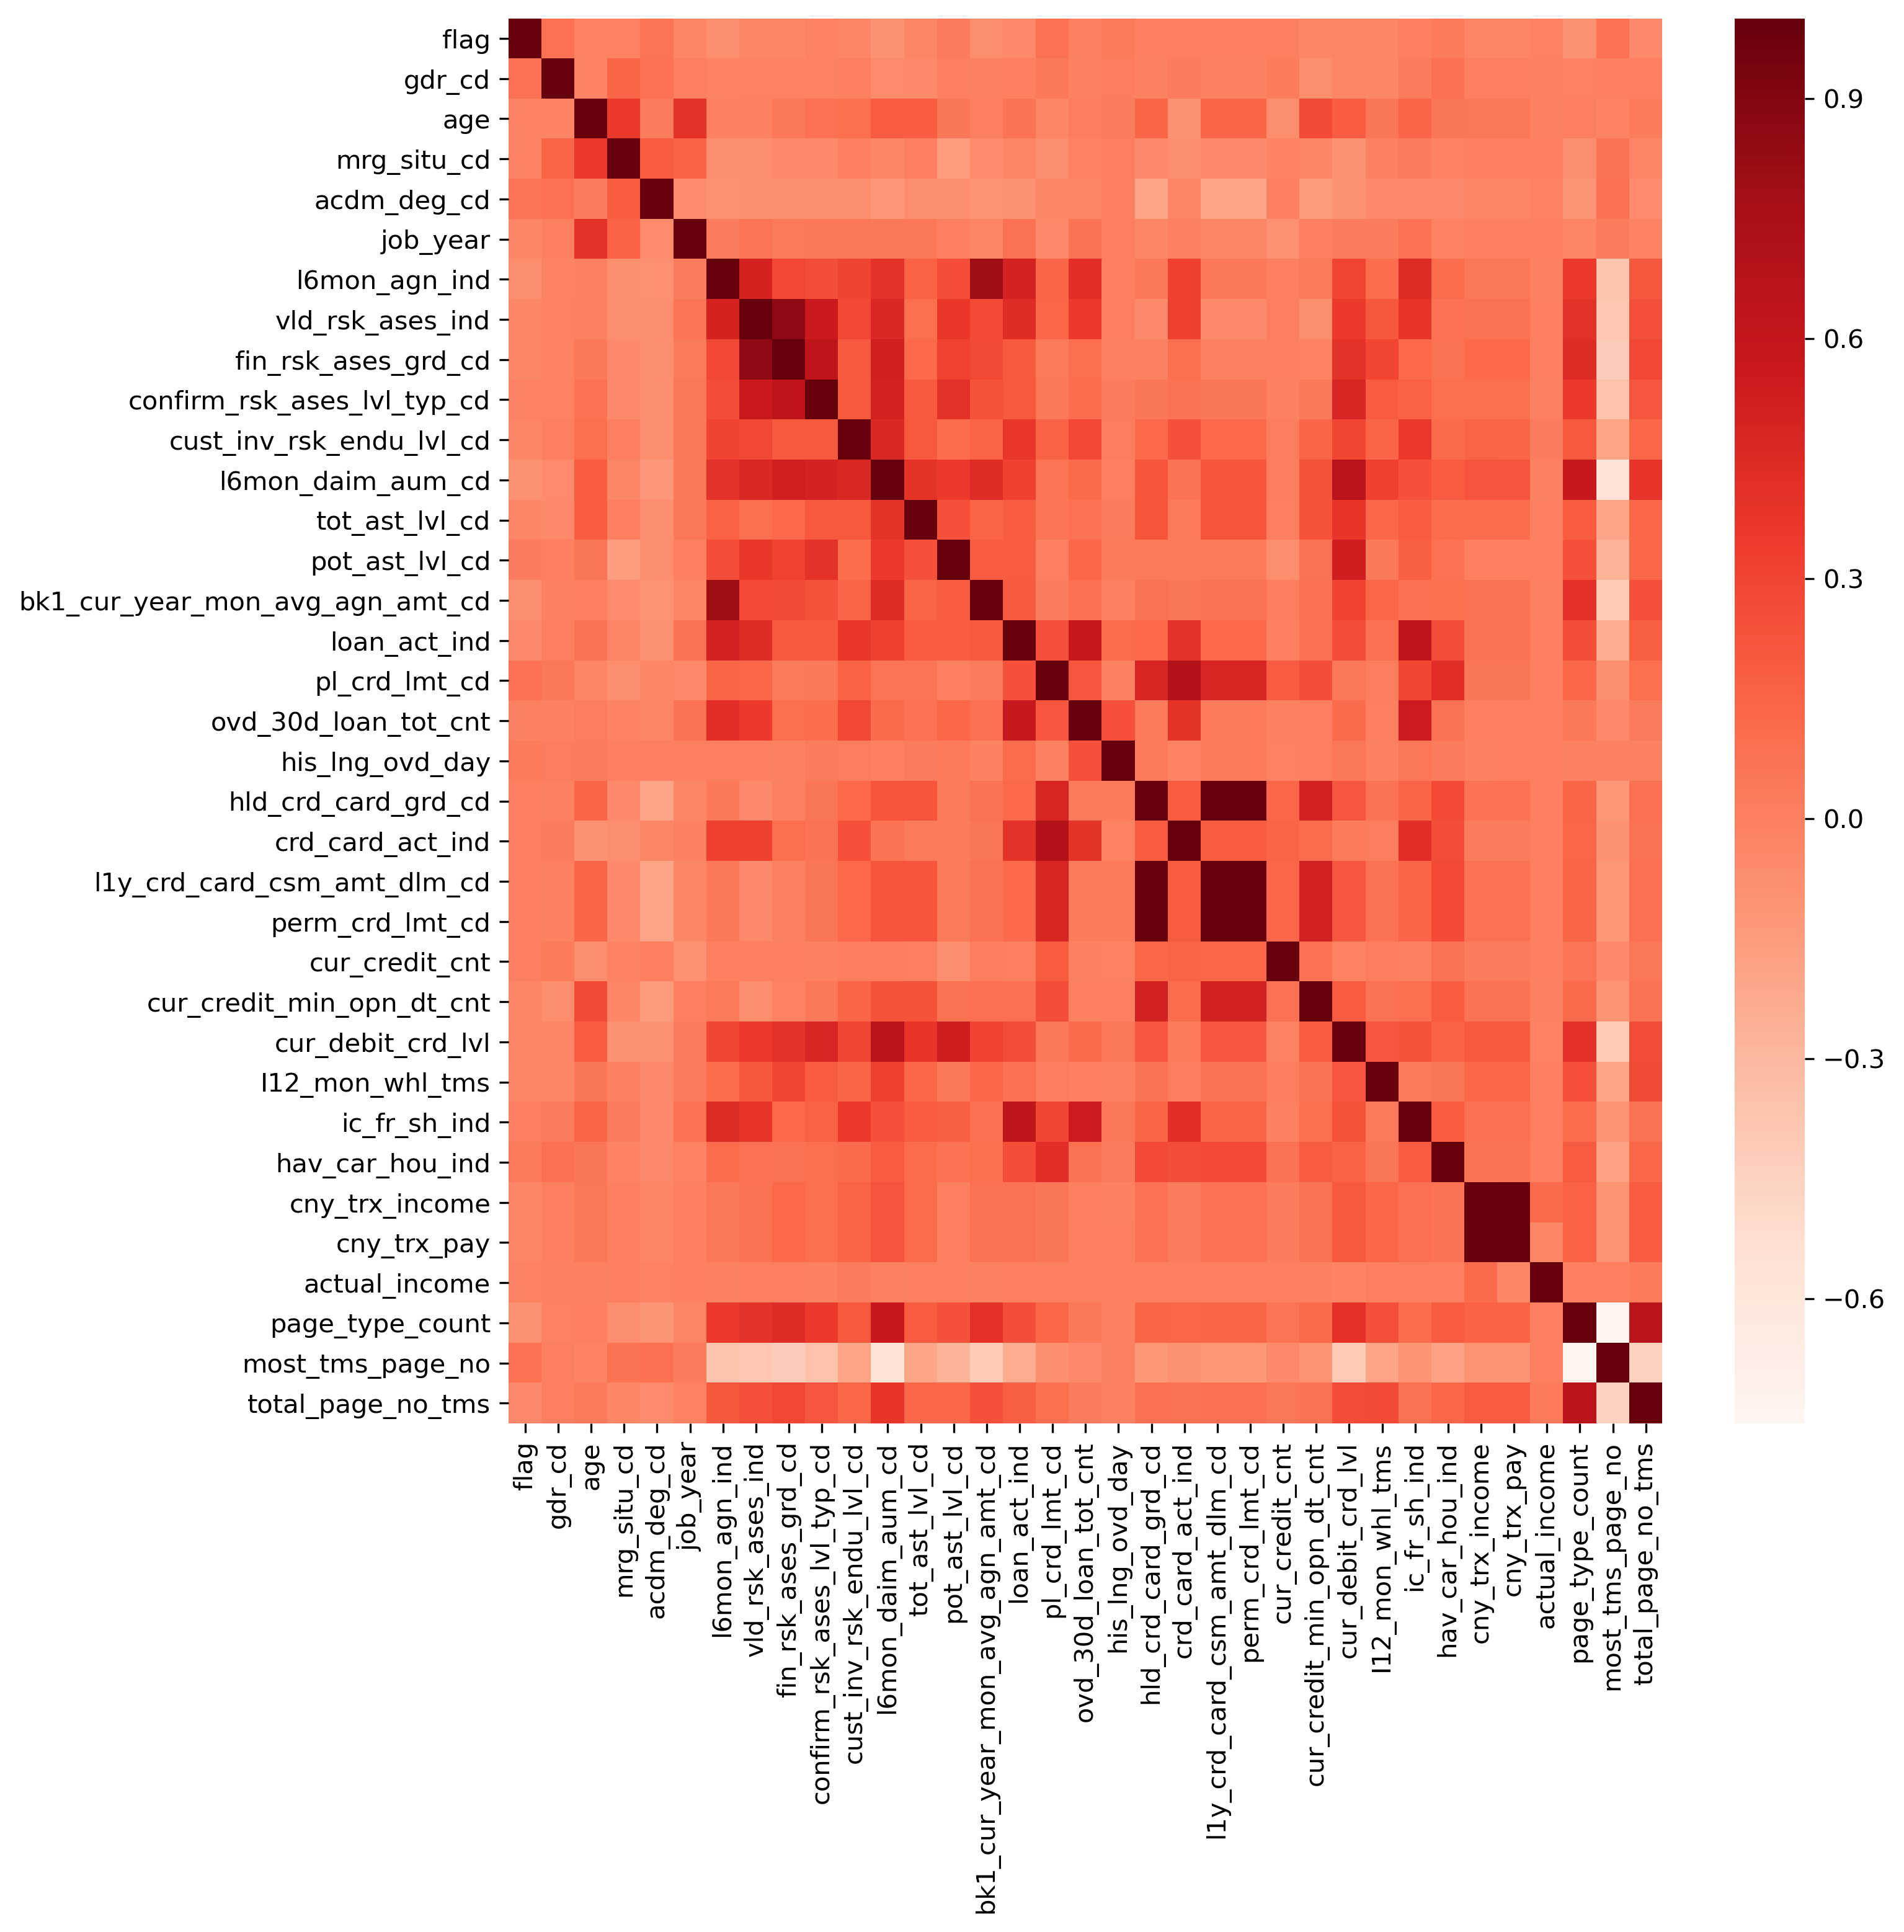

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10, 10), dpi = 300)
sns.heatmap(temp.corr(), cmap = 'Reds', annot = False) # temp.drop(['id'], axis = 1)
plt.show()

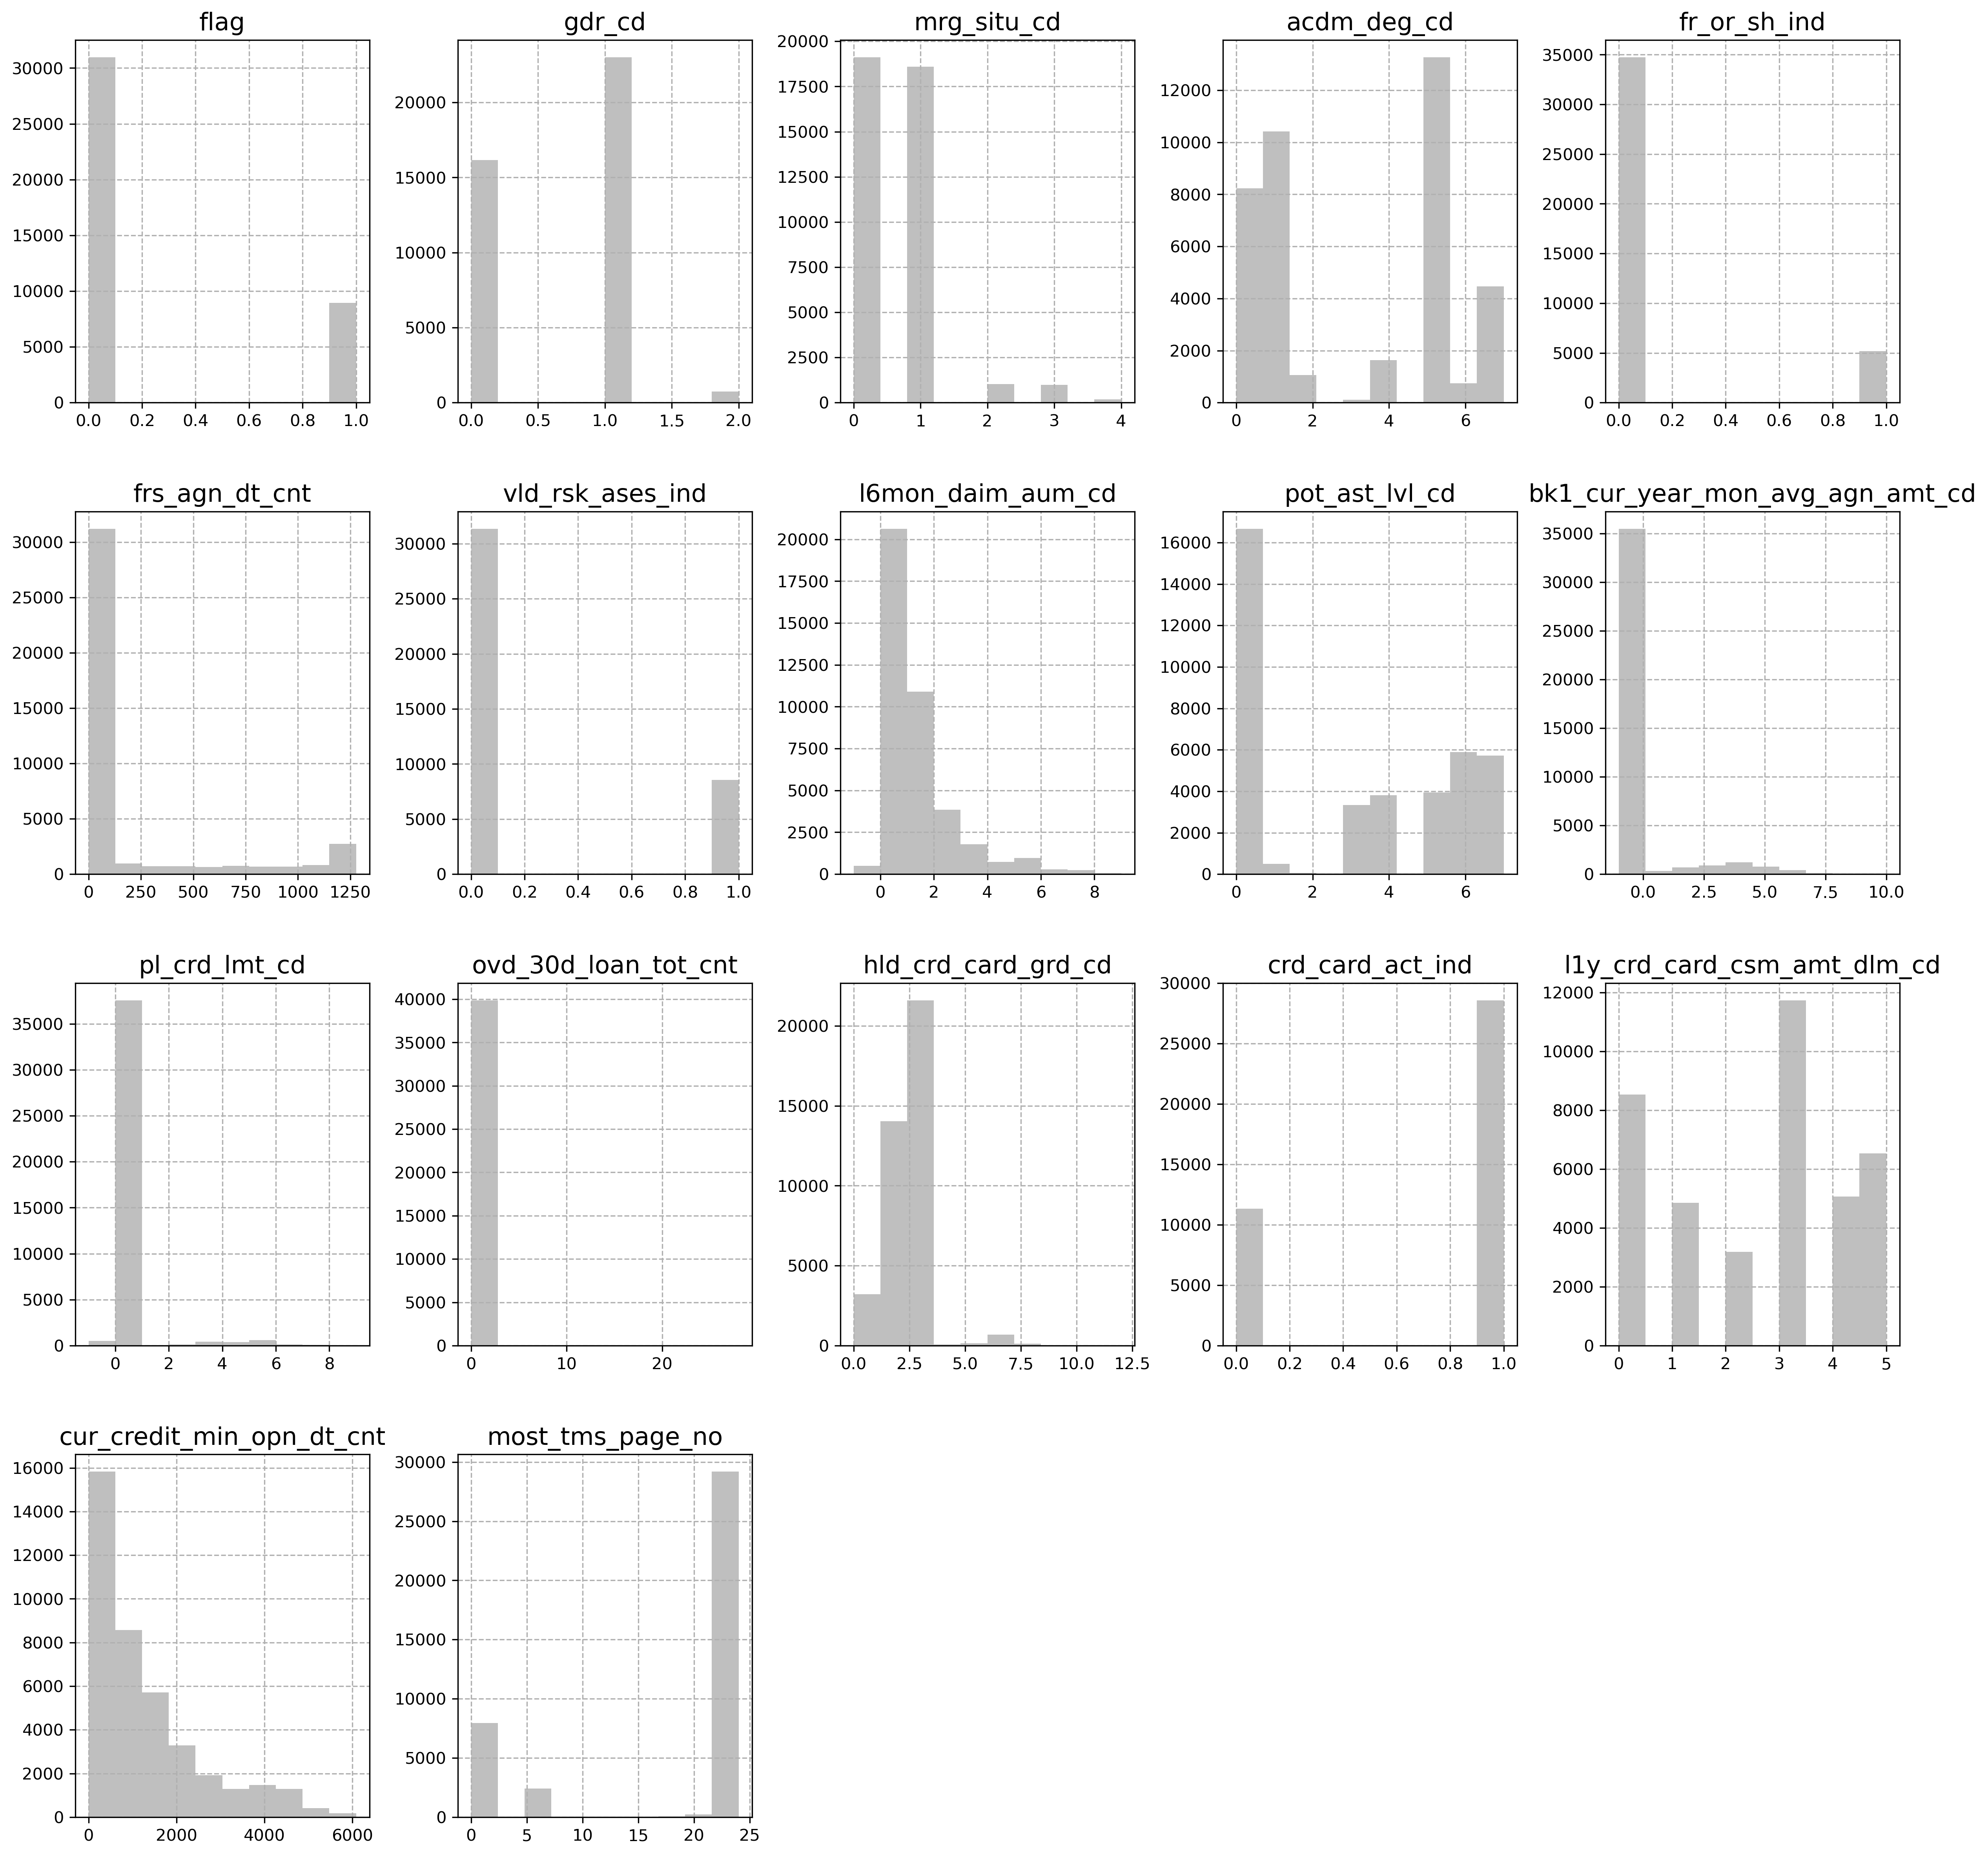

In [87]:
temp2 = temp.reset_index(drop = True)
plt.figure(figsize=(20,20),dpi=300)
plt.subplots_adjust(wspace =0.3, hspace =0.3)
for n,i in enumerate(temp2.columns):
    plt.subplot(4,5,n+1)
    plt.title(i,fontsize=15)
    plt.grid(linestyle='--')
    temp2[i].hist(color='grey',alpha=0.5)

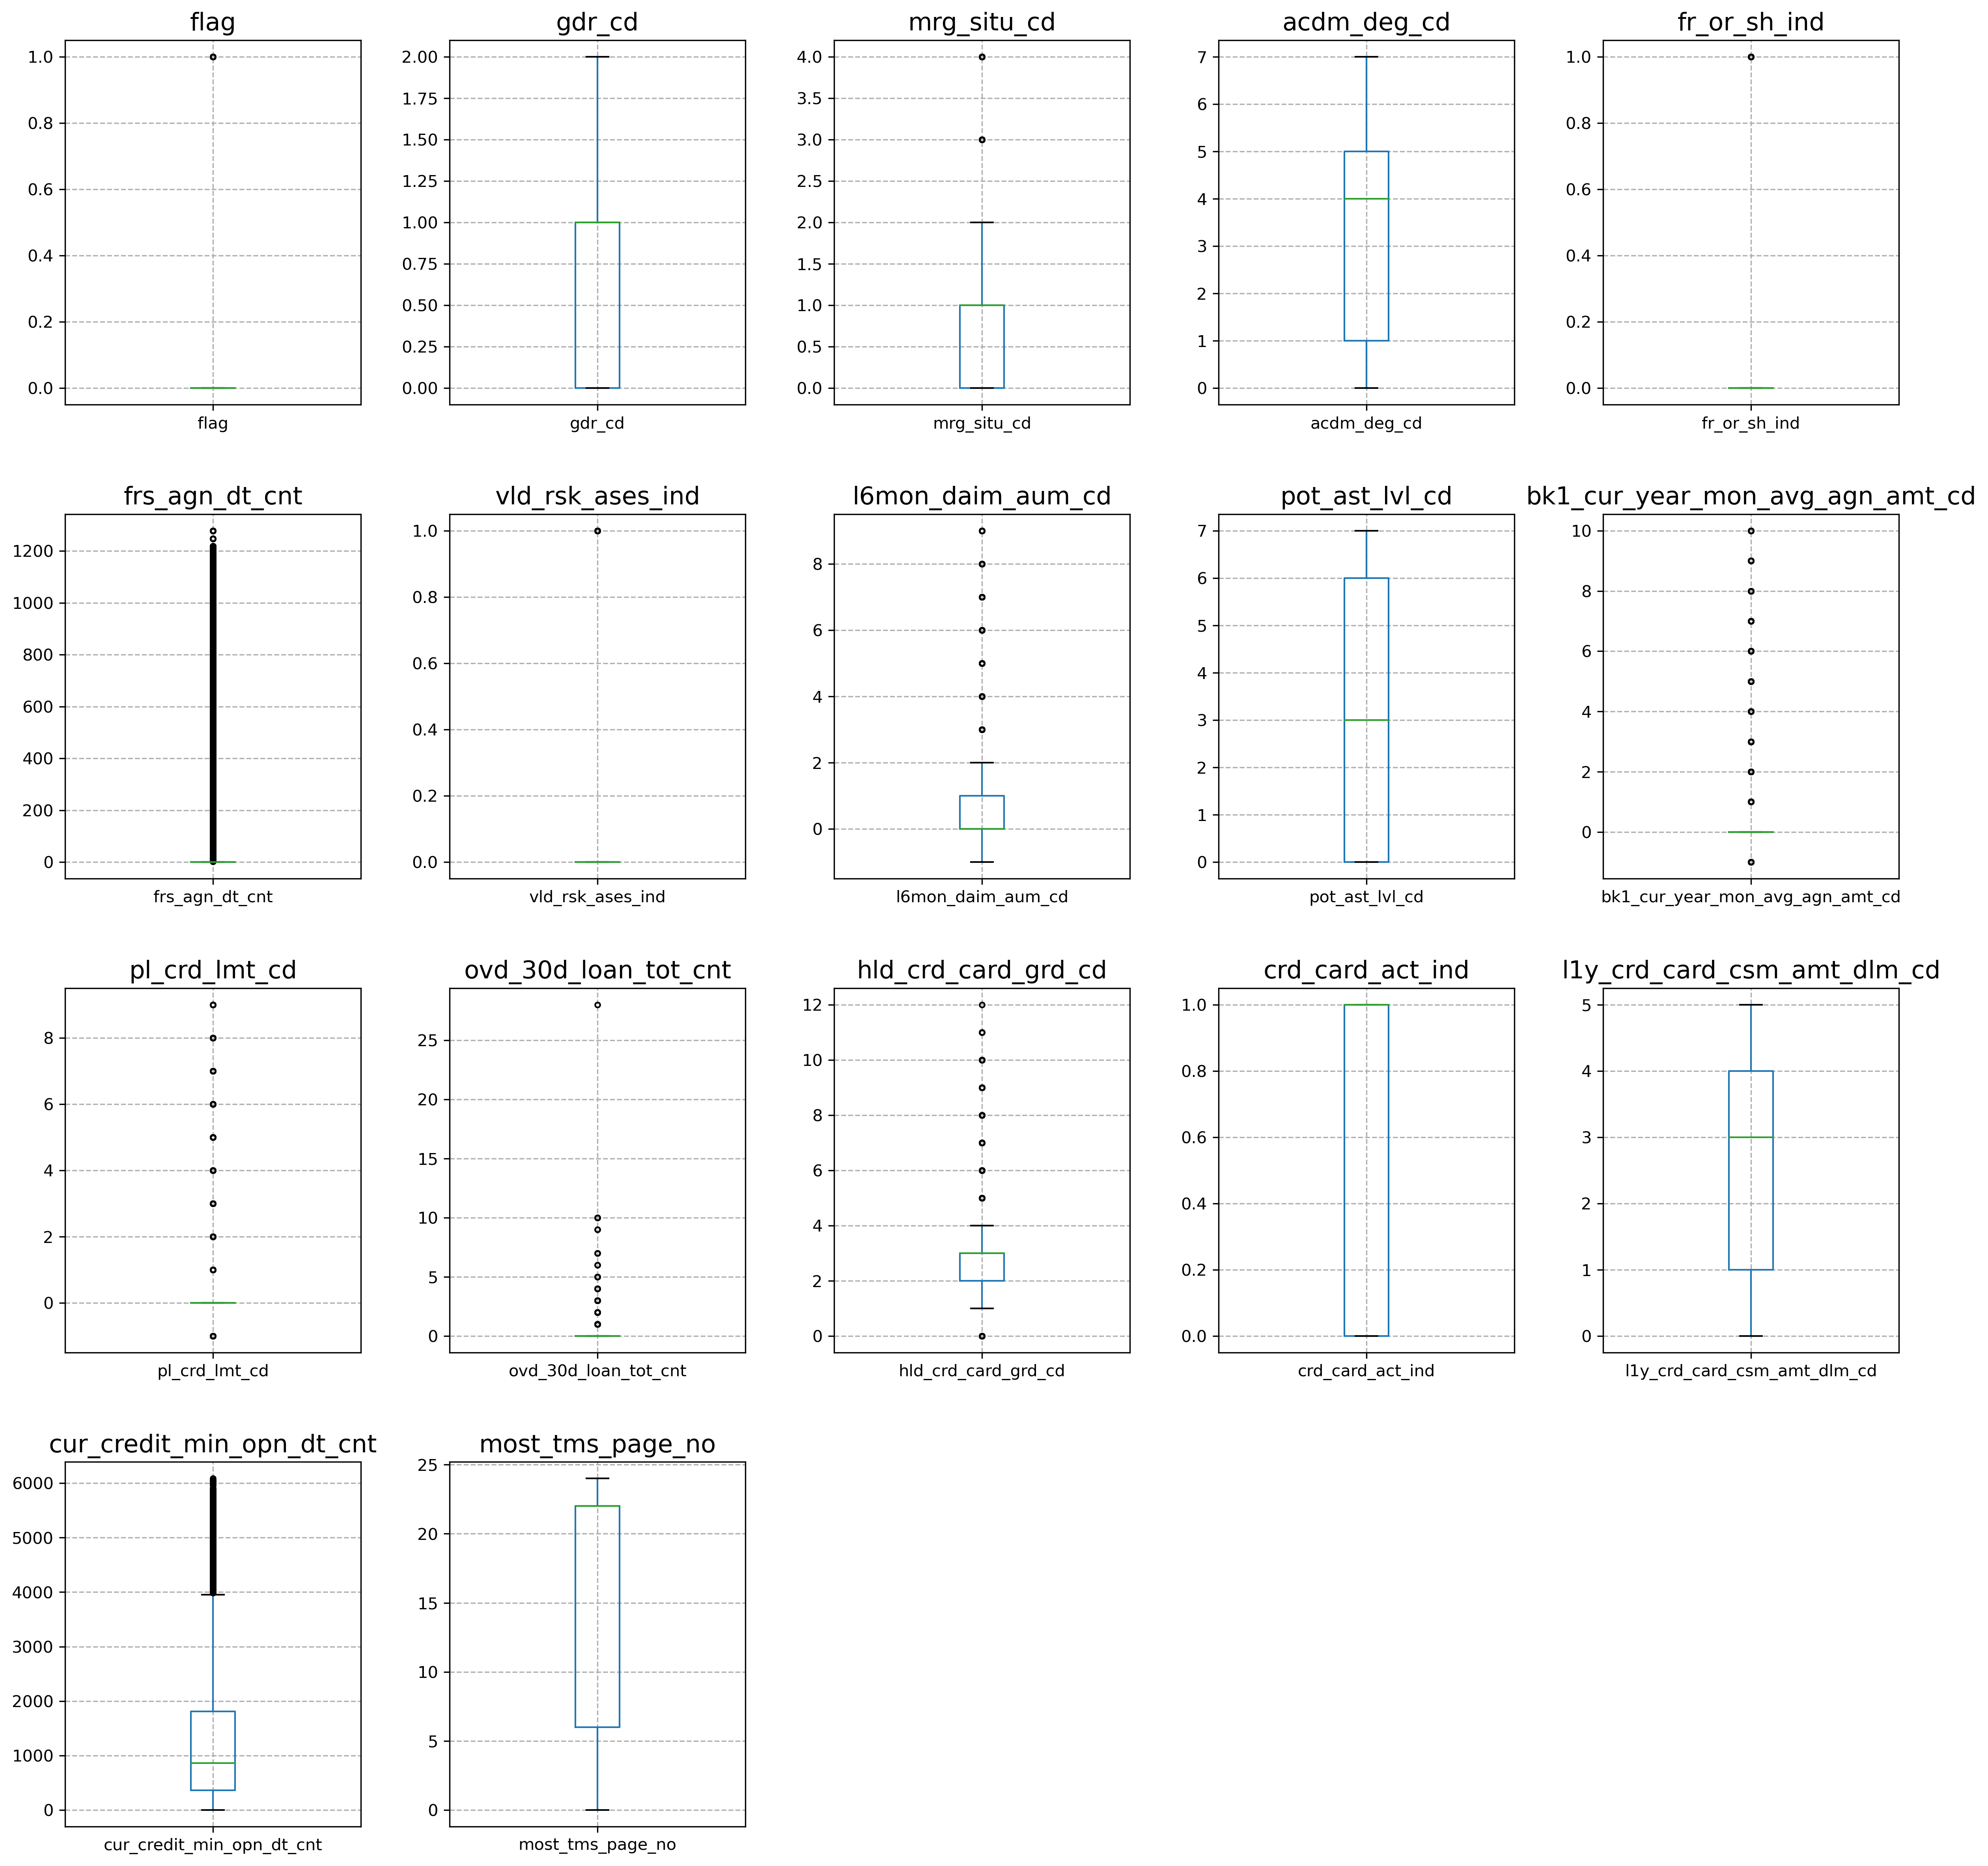

In [89]:
#temp2 = temp.drop(['id'], axis = 1)
plt.figure(figsize = (20, 20), dpi = 300)
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
for n, i in enumerate(temp2.columns):
    plt.subplot(4, 5, n+1)
    plt.title(i, fontsize=15)
    plt.grid(linestyle='--')
    temp2[[i]].boxplot(sym='.')

# 尝试预测

In [78]:
#train_DF_weneed = train_DF.drop(['id'] + noSelectName, axis = 1)
train_DF_weneed = train_DF.drop(['id'], axis = 1)
train_DF_weneed.head()

,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
0,0,M,41,B,Z,3,0,0,-1,4,1,0,-1,6,0,0,0,0,0,3,0,3,3,0,-1,10,0,0,0,17400.00,15000.00,2400.00,0,Undo,0
1,0,M,35,A,G,4,0,0,-1,-1,1,0,-1,-1,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00,0,Undo,0
2,0,M,53,B,C,9,1,1,3,3,6,7,-1,2,8,0,0,0,0,7,0,7,7,0,-1,40,6,0,0,105718.04,131158.00,-25439.96,6,CQA,35
3,0,F,41,B,Z,0,0,0,-1,-1,1,0,-1,6,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00,0,Undo,0
4,0,F,42,B,Z,3,0,0,-1,-1,1,5,-1,3,0,1,0,0,4,2,0,2,2,0,-1,20,0,2,2,79505.55,70416.04,9089.51,7,CQA,22


In [79]:
train_DF_weneed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   flag                             39923 non-null  int64  
 1   gdr_cd                           39923 non-null  object 
 2   age                              39923 non-null  int64  
 3   mrg_situ_cd                      39923 non-null  object 
 4   acdm_deg_cd                      39923 non-null  object 
 5   job_year                         39923 non-null  int64  
 6   l6mon_agn_ind                    39923 non-null  int64  
 7   vld_rsk_ases_ind                 39923 non-null  int64  
 8   fin_rsk_ases_grd_cd              39923 non-null  int64  
 9   confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 10  cust_inv_rsk_endu_lvl_cd         39923 non-null  int64  
 11  l6mon_daim_aum_cd                39923 non-null  int64  
 12  tot_ast_lvl_cd    

In [81]:
strCol2 = [train_DF_weneed.columns.values.tolist()[1]] + \
    train_DF_weneed.columns.values.tolist()[3:5] + \
    [train_DF_weneed.columns.values.tolist()[33]]

strCol2

['gdr_cd', 'mrg_situ_cd', 'acdm_deg_cd', 'most_tms_page_no']

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoderLabel = LabelEncoder()

for sC in strCol2:
    train_DF_weneed[sC] = encoderLabel.fit_transform(train_DF_weneed[sC])

train_DF_weneed.head()

,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
0,0,1,41,1,7,3,0,0,-1,4,1,0,-1,6,0,0,0,0,0,3,0,3,3,0,-1,10,0,0,0,17400.00,15000.00,2400.00,0,22,0
1,0,1,35,0,5,4,0,0,-1,-1,1,0,-1,-1,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00,0,22,0
2,0,1,53,1,2,9,1,1,3,3,6,7,-1,2,8,0,0,0,0,7,0,7,7,0,-1,40,6,0,0,105718.04,131158.00,-25439.96,6,2,35
3,0,0,41,1,7,0,0,0,-1,-1,1,0,-1,6,0,0,0,0,0,1,0,1,1,0,-1,10,0,0,0,0.00,0.00,0.00,0,22,0
4,0,0,42,1,7,3,0,0,-1,-1,1,5,-1,3,0,1,0,0,4,2,0,2,2,0,-1,20,0,2,2,79505.55,70416.04,9089.51,7,2,22


In [83]:
train_DF_weneed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   flag                             39923 non-null  int64  
 1   gdr_cd                           39923 non-null  int32  
 2   age                              39923 non-null  int64  
 3   mrg_situ_cd                      39923 non-null  int32  
 4   acdm_deg_cd                      39923 non-null  int32  
 5   job_year                         39923 non-null  int64  
 6   l6mon_agn_ind                    39923 non-null  int64  
 7   vld_rsk_ases_ind                 39923 non-null  int64  
 8   fin_rsk_ases_grd_cd              39923 non-null  int64  
 9   confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 10  cust_inv_rsk_endu_lvl_cd         39923 non-null  int64  
 11  l6mon_daim_aum_cd                39923 non-null  int64  
 12  tot_ast_lvl_cd    

In [84]:
train_DF_weneed['flag'].value_counts()

0    30970
1     8953
Name: flag, dtype: int64

In [109]:
# 从数据初探可以发现，'未来两年可能违约'标签类别分布不均，需对样本进行重取样
def resample(df):
    '''
    使样本'未来两年可能违约'标签的0，1项可以各占一半，以提高预测效果。sample()可以考虑添加random_state以便生成相同样本集
    df：数据源
    '''
    num = df['flag'].value_counts()[1]
    df_t = df[df.flag == 1]
    df_f = df[df.flag == 0].sample(frac=1)[0:num]
    df_balanced = pd.concat([df_t,df_f]).sample(frac=1).reset_index(drop=True)
#     print(df_balanced.未来两年可能违约.value_counts())
    return df_balanced

In [110]:
df_balanced = resample(train_DF_weneed)
df_balanced['flag'].value_counts()

1    8953
0    8953
Name: flag, dtype: int64

In [85]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.linear_model import LinearRegression,LassoCV,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score, \
                            precision_score,recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [86]:
def perfomance_clf(model,X,y,name=None):
    y_predict = model.predict(X)
    if name:
        print(name,':')
    print(f'accuracy score is: {accuracy_score(y,y_predict)}')
    print(f'precision score is: {precision_score(y,y_predict)}')
    print(f'recall score is: {recall_score(y,y_predict)}')
    print(f'auc: {roc_auc_score(y,y_predict)}')
    print('- - - - - - ')


## 总的！

In [113]:
train_x.head()

,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,hav_car_hou_ind,cny_trx_income,cny_trx_pay,most_tms_page_no,total_page_no_tms
0,1,41,1,7,3,0,0,0,0,0,0,9,1,0,0,7,0,0,0,0,0,0,0,0,3,0,0,10,0,0,17400.00,15000.00,22,0
1,1,35,0,5,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10,0,0,0.00,0.00,22,0
2,1,53,1,2,9,0,0,1,935,1,5,8,6,7,0,3,8,0,0,0,0,0,0,0,7,0,0,40,6,0,105718.04,131158.00,2,35
3,0,41,1,7,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,1,0,0,10,0,0,0.00,0.00,22,0
4,0,42,1,7,3,1,1,0,0,0,0,0,1,5,0,4,0,1,6,0,4,0,0,0,2,0,0,20,0,2,79505.55,70416.04,2,22


In [114]:
xtrain, xtest, ytrain, ytest = train_test_split(train_x, train_y, test_size=0.2)    # random_state=42

# 分层k折交叉拆分器 - 用于网格搜索
cv = StratifiedKFold(n_splits=3,shuffle=True)

In [115]:
# 参数设定
log_params = {"penalty":['l1','l2'],
                 'C':[0.001*10**i for i in range(0,7)]}
# 参数搜索
log_gridsearch = GridSearchCV(LogisticRegression(solver='liblinear'),log_params,cv=cv,
                               n_jobs=-1,scoring='roc_auc',verbose=2,refit=True)
# 工作流管道
pipe_log = Pipeline([
        ('sc',StandardScaler()),    # 标准化Z-score
        ('pow_trans',PowerTransformer()),    # 纠偏
        ('log_grid',log_gridsearch)
        ])
# 搜索参数并训练模型
pipe_log.fit(xtrain,ytrain)
# 最佳参数组合
print(pipe_log.named_steps['log_grid'].best_params_)
# 训练集性能指标
perfomance_clf(pipe_log, xtrain, ytrain, name='train')
# 测试集性能指标
perfomance_clf(pipe_log, xtest, ytest, name='test')

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  1.7min finished


{'C': 1000.0, 'penalty': 'l2'}
train :
accuracy score is: 0.7831736489448307
precision score is: 0.6117788461538461
recall score is: 0.07157924342567852
auc: 0.5292846070111032
- - - - - - 
test :
accuracy score is: 0.7757044458359424
precision score is: 0.6143497757847534
recall score is: 0.0743756786102063
auc: 0.5301880020920151
- - - - - - 


## 原始

In [87]:
df_x = train_DF_weneed.drop(['flag'], axis = 1)
df_y = train_DF_weneed['flag']
xtrain, xtest, ytrain, ytest = train_test_split(df_x, df_y, test_size=0.2)    # random_state=42

# 分层k折交叉拆分器 - 用于网格搜索
cv = StratifiedKFold(n_splits=3,shuffle=True)

In [88]:
train_DF_weneed.flag.value_counts()

0    30970
1     8953
Name: flag, dtype: int64

In [89]:
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import model_selection

def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr)#, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

In [90]:
def logistic(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2020)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    prob = lr.predict_proba(X_test)
    
    roc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
    print('roc ',roc)

    return (prob[:,1],y_test)

probs, y_test=logistic(df_x, df_y)

roc  0.5362995744533545


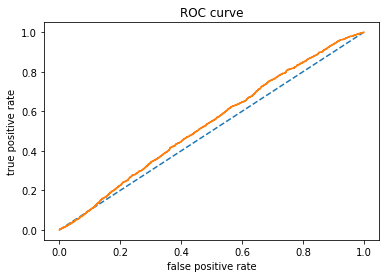

In [91]:
plot_roc(y_test,probs)

roc  0.5356180111683208


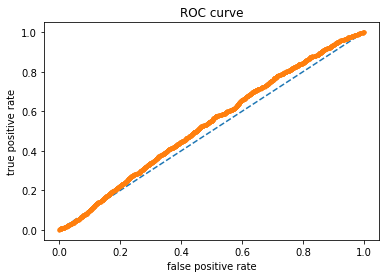

In [148]:
probs, y_test=logistic(train_x, train_y)
plot_roc(y_test,probs)

0.5002875215641173


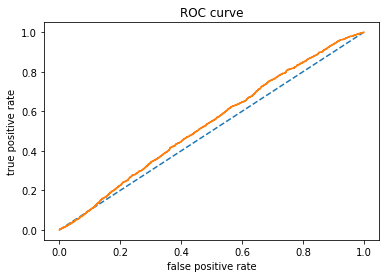

In [92]:
trainx, valx, trainy, valy = train_test_split(df_x, df_y, test_size=.2, random_state=2020)

clf = LogisticRegression(solver="lbfgs").fit(trainx, trainy)
pred_y = clf.predict(valx)

rocrl=roc_auc_score(valy, pred_y)
print(rocrl)
plot_roc(valy, pred_y)

In [93]:
perfomance_clf(clf, df_x, df_y)

accuracy score is: 0.7757182576459685
precision score is: 0.4444444444444444
recall score is: 0.0004467776164414163
auc: 0.5001426655276267
- - - - - - 


0.5002875215641173


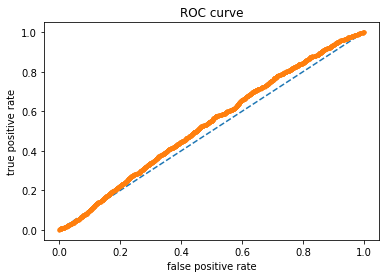

In [149]:
trainx, valx, trainy, valy = train_test_split(train_x, train_y, test_size=.2, random_state=2020)

clf = LogisticRegression(solver="lbfgs").fit(trainx, trainy)
pred_y = clf.predict(valx)

rocrl=roc_auc_score(valy, pred_y)
print(rocrl)
plot_roc(valy, pred_y)

In [95]:
model = RandomForestClassifier(n_estimators=200, class_weight = {0: 1, 1:3}).fit(trainx, trainy)
predictionforest = model.predict(valx)

rocrf=roc_auc_score(valy, predictionforest)
print('roc ',rocrf)
perfomance_clf(model, valx, valy)

roc  0.5931465833360493
accuracy score is: 0.8020037570444584
precision score is: 0.627831715210356
recall score is: 0.22311673375503163
auc: 0.5931465833360493
- - - - - - 


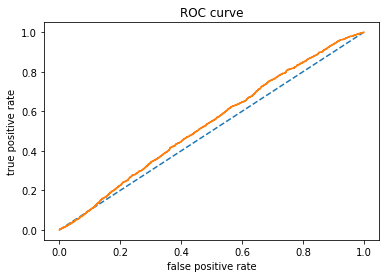

In [96]:
plot_roc(valy, predictionforest)

In [98]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, 
                            n_estimators = 1000,
                            scale_pos_weight = 3,
                            #objective = 'binary:logistic',
                            #eval_metric = 'auc',
                           )

xgb_cfl.fit(trainx, trainy)
y_scorexgb = xgb_cfl.predict_proba(valx)[:,1]

rocxgb=roc_auc_score(valy, y_scorexgb)
print('roc ',rocxgb)
perfomance_clf(xgb_cfl, valx, valy)

roc  0.6888297181846755
accuracy score is: 0.7721978710081403
precision score is: 0.4725274725274725
recall score is: 0.3956296722254169
auc: 0.636335489330768
- - - - - - 


In [159]:
y_scorexgb[:20]

array([0.01720887, 0.10019525, 0.05231287, 0.05701066, 0.3127086 ,
       0.7657857 , 0.6620381 , 0.13470528, 0.579304  , 0.17212407,
       0.08684223, 0.00411403, 0.07734465, 0.23942119, 0.15907817,
       0.04909797, 0.06482598, 0.10008057, 0.09962623, 0.07429726],
      dtype=float32)

In [156]:
valy[:20].tolist()

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]

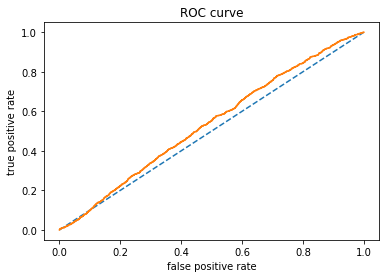

In [163]:
plot_roc(valy, y_scorexgb)

In [99]:
log_cfl = LogisticRegression()

param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', {0: 1, 1: 3}], 
            'C' : [0.1, 1, 10, 100, 1000]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(trainx, trainy)

best_parameters = CV_log_cfl.best_params_
print("The best parameters: ", best_parameters)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.5s finished


The best parameters:  {'C': 10, 'class_weight': {0: 1, 1: 3}, 'penalty': 'l1'}


roc  0.6511382465916772
accuracy score is: 0.6563556668753914
precision score is: 0.32521739130434785
recall score is: 0.5376653248993675
auc: 0.613533270839053
- - - - - - 


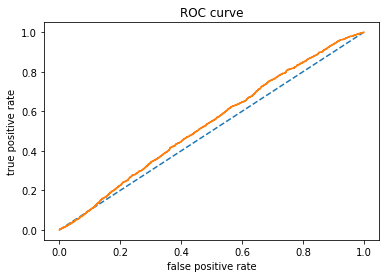

In [107]:
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(trainx, trainy)
#y_scoreLR = log_cfl.decision_function(valx)
y_scoreLR = log_cfl.predict_proba(valx)[:, 1]

rocLR=roc_auc_score(valy, y_scoreLR)
print('roc ',rocLR)
perfomance_clf(log_cfl, valx, valy)
plot_roc(valy, y_scoreLR)

In [105]:
y_scoreLR[:20]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
rf_cfl = RandomForestClassifier(n_estimators=120).fit(trainx, trainy)

param_grid = {
            'n_estimators': [50, 100, 200],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'class_weight' :  ['balanced', {0: 1, 1: 3}],
            }

CV_rnd_cfl = GridSearchCV(estimator = rf_cfl, param_grid = param_grid, scoring = 'roc_auc', verbose = 10, n_jobs = -1)
CV_rnd_cfl.fit(trainx, trainy)

best_parameters = CV_rnd_cfl.best_params_
print("The best parameters: ", best_parameters)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  8

roc  0.6857431194147118


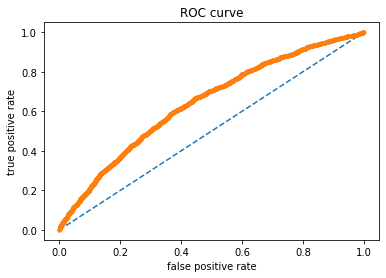

In [146]:
rf_cfl = RandomForestClassifier(n_estimators = best_parameters['n_estimators'], 
                                 max_features = best_parameters['max_features'],  
                                 min_samples_leaf = best_parameters['min_samples_leaf'],  
                                 min_samples_split = 5)
rf_cfl.fit(trainx, trainy)
y_score = rf_cfl.predict_proba(valx)[:,1]

rocRF=roc_auc_score(valy, y_score)
print('roc ',rocRF)
perfomance_clf(log_cfl, valx, valy)

plot_roc(valy, y_score)

from sklearn.model_selection import cross_val_predict
penalty = {
    0: 1, #这里设置为5倍
    1: 10
}
# "balanced"
lr = LogisticRegression(class_weight=penalty)
# kf = KFold(features.shape[0], random_state=1)
kf = 10
predictions = cross_val_predict(lr, xtrain, ytrain, cv=kf)


print(predictions[:20])

predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (ytrain == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (ytrain == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (ytrain == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (ytrain == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)#真正率
print()
print(fpr)#假正率
print()
print(predictions[:20])

In [117]:
# 参数设定
log_params = {"penalty":['l1','l2'],
                 'C':[0.001*10**i for i in range(0,7)]}
# 参数搜索
log_gridsearch = GridSearchCV(LogisticRegression(solver='liblinear'),log_params,cv=cv,
                               n_jobs=-1,scoring='roc_auc',verbose=2,refit=True)
# 工作流管道
pipe_log = Pipeline([
        ('sc',StandardScaler()),    # 标准化Z-score
        ('pow_trans',PowerTransformer()),    # 纠偏
        ('log_grid',log_gridsearch)
        ])
# 搜索参数并训练模型
pipe_log.fit(xtrain,ytrain)
# 最佳参数组合
print(pipe_log.named_steps['log_grid'].best_params_)
# 训练集性能指标
perfomance_clf(pipe_log, xtrain, ytrain, name='train')
# 测试集性能指标
perfomance_clf(pipe_log, xtest, ytest, name='test')

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    5.1s finished


{'C': 0.01, 'penalty': 'l2'}
train :
accuracy score is: 0.7773498653641431
precision score is: 0.5122950819672131
recall score is: 0.01756358016017985
auc: 0.506384626388055
- - - - - - 
test :
accuracy score is: 0.771947401377583
precision score is: 0.631578947368421
recall score is: 0.0196078431372549
auc: 0.5080963268377768
- - - - - - 


In [118]:
cross_val_score(pipe_log,xtrain,ytrain,cv=3,scoring='roc_auc').mean()

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.9s finished


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    4.9s finished


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    4.6s finished


0.6371386603677188

In [90]:
# 随机森林分类模型
rf_clf = RandomForestClassifier(criterion='gini',
                               n_jobs=-1,
                               n_estimators=1000)    # random_state
# 参数设定
rf_grid_params = {'max_features':['auto'],    # ['auto',0.5,0.6,0.9] 未知最优参数时可以自己设定组合
                    'max_depth':[6,9]}    # [3,6,9]
# 参数搜索
rf_gridsearch = GridSearchCV(rf_clf,rf_grid_params,cv=cv,
                               n_jobs=-1,scoring='roc_auc',verbose=10,refit=True)
# 工作流管道
pipe_rf = Pipeline([
        ('sc',StandardScaler()),
        ('pow_trans',PowerTransformer()),
        ('rf_grid',rf_gridsearch)
        ])
# 搜索参数并训练模型
pipe_rf.fit(xtrain,ytrain)
# 最佳参数组合
print(pipe_rf.named_steps['rf_grid'].best_params_)
# 训练集性能指标
perfomance_clf(pipe_rf,xtrain,ytrain,name='train')
# 测试集性能指标
perfomance_clf(pipe_rf,xtest,ytest,name='test')

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  1.8min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  1.8min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  2.1min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.0min finished


{'max_depth': 9, 'max_features': 'auto'}
train :
accuracy score is: 0.7850209781451563
precision score is: 0.8023952095808383
recall score is: 0.056074766355140186
auc: 0.5260389173533543
- - - - - - 
test :
accuracy score is: 0.780463368816531
precision score is: 0.624
recall score is: 0.043721973094170405
auc: 0.5180712752102041
- - - - - - 


In [92]:
# 注意！！！交叉验证查看平均分数（由于管道会反复搜索参数，会较耗时）
cross_val_score(pipe_rf,xtrain,ytrain,cv=3,scoring='roc_auc').mean()

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   46.5s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   46.6s remaining:   46.6s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   48.8s remaining:   24.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.2min finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   47.1s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   47.4s remaining:   47.4s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   51.6s remaining:   25.7s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   49.2s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   49.6s remaining:   49.6s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   53.0s remaining:   26.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min finished


0.6976826047335493

## balance

In [82]:
df_x = df_balanced.drop(['flag'], axis = 1)
df_y = df_balanced['flag']
xtrain, xtest, ytrain, ytest = train_test_split(df_x, df_y, test_size=0.2)    # random_state=42

# 分层k折交叉拆分器 - 用于网格搜索
cv = StratifiedKFold(n_splits=3,shuffle=True)

In [84]:
# 参数设定
log_params = {"penalty":['l1','l2'],
                 'C':[0.001*10**i for i in range(0,7)]}
# 参数搜索
log_gridsearch = GridSearchCV(LogisticRegression(solver='liblinear'),log_params,cv=cv,
                               n_jobs=-1,scoring='roc_auc',verbose=2,refit=True)
# 工作流管道
pipe_log = Pipeline([
        ('sc',StandardScaler()),    # 标准化Z-score
        ('pow_trans',PowerTransformer()),    # 纠偏
        ('log_grid',log_gridsearch)
        ])
# 搜索参数并训练模型
pipe_log.fit(xtrain,ytrain)
# 最佳参数组合
print(pipe_log.named_steps['log_grid'].best_params_)
# 训练集性能指标
perfomance_clf(pipe_log, xtrain, ytrain, name='train')
# 测试集性能指标
perfomance_clf(pipe_log, xtest, ytest, name='test')

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.9s finished


{'C': 0.1, 'penalty': 'l1'}
train :
accuracy score is: 0.6315973191845853
precision score is: 0.6320395201129146
recall score is: 0.6264689423614997
auc: 0.6315873139901145
- - - - - - 
test :
accuracy score is: 0.6217197096594081
precision score is: 0.6276958002270148
recall score is: 0.6127423822714682
auc: 0.6217904370558243
- - - - - - 
